# Text Analysis and Generation

Chapter 12 from Think Python

These are some very basic ideas about analyzing text

It is a sort of nice illustration of a bunch of Python functions

In [3]:

# this file is 'The Strange Case of Dr. Jeckyll and Mr. Hyde' by Robert Louis
# Stevenson.   I got a copy of it from the Gutenburg Project

filename = 'data/dr_jeckyl.txt'

In [4]:
#finding the unique words in the book

# create an empty dictionary

unique_words = {}

# open a file, and read one line at a time and process it

for line in open(filename, encoding="utf-8"):
    seq = line.split()                            #split each line into words

    for word in seq:                              # for each word, put 1 in the dictionary, indexed by the word
        unique_words[word] = 1

# how many values are there in the dictionary?

len(unique_words)

6741

In [5]:
# sort the words in the dictionary by their length
# kind of a cool move to be able to do this

sorted(unique_words, key=len)[-10:]

['coolness—frightened',
 'gentleman—something',
 'pocket-handkerchief.',
 '(www.gutenberg.org),',
 'extraordinary-looking',
 'continually-impending',
 '(trademark/copyright)',
 'www.gutenberg.org/contact',
 'www.gutenberg.org/donate.',
 'www.gutenberg.org/license.']

We have a number of "words" that are actually hyphenations

We want to remove the hyphenations

Create a line splitting function

In [6]:
def split_line(line):
    return line.replace('—', ' ').split()

This function strips out all punctuation based on a list of punctuation taken from 
the document

It also converts all the words to lower case, which should reduce the word count as well

In [7]:
def clean_word(word):
    return word.strip(punctuation).lower()

This bit of code looks at each  character in the file and determines its unicode category



In [8]:
# find all the punctuation

import unicodedata


punc_marks = {}
for line in open(filename,encoding="utf-8"):
    for char in line:
        category = unicodedata.category(char)
        if category.startswith('P'):
            punc_marks[char] = 1

In [9]:
punctuation = ''.join(punc_marks)
print(punctuation)

.,-:[#]*’;“”?—‘()…!_/•%


In [10]:
# Side Quest-  looking at unicode categories

import unicodedata

print(unicodedata.category('A'))
print(unicodedata.category('a'))
print(unicodedata.category('\n'))
print(unicodedata.category('1'))
print(unicodedata.category(':'))

Lu
Ll
Cc
Nd
Po


Recount the words,   removing punctuation and hyphens, and converting all words
to lower cases

In [11]:
unique_words2 = {}
for line in open(filename,encoding="utf-8"):
    for word in split_line(line):
        word = clean_word(word)
        unique_words2[word] = 1

len(unique_words2)

4438

In [12]:
sorted(unique_words2, key=len)[-10:]

['machine-readable',
 'www.gutenberg.org',
 'chocolate-coloured',
 'pocket-handkerchief',
 'trademark/copyright',
 'extraordinary-looking',
 'continually-impending',
 'www.gutenberg.org/donate',
 'www.gutenberg.org/license',
 'www.gutenberg.org/contact']

# Word Frequencies

We can now count up the frequencies with which words appear

Use a dictionary and put each previously unseen word into the dictionary with a count of 1. 

Increment the entries each time a word is found.

In [13]:
word_counter = {}
for line in open(filename,encoding="utf-8"):
    for word in split_line(line):
        word = clean_word(word)
        if word not in word_counter:
            word_counter[word] = 1
        else:
            word_counter[word] += 1

In [14]:
def second_element(t):
    return t[1]

In [15]:
items = sorted(word_counter.items(), key=second_element, reverse=True)

In [16]:
for word, freq in items[:5]:
    print(freq, word, sep='\t')


1811	the
1067	of
1044	and
727	to
691	a


# Removing "stopwords"

Most languages have stopwords, that just contribute to the structure of the language, our list of most used words is full of stopwords

We can get a lit of stopwards and exclude them

The Natural Language Toolkit has many tools for handling language, including a set of stopwords

In [17]:
!pip install nltk

In [18]:
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\water\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [19]:
stop_words = set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [20]:
# do the word count again, but removing all stop words

word_counter = {}
for line in open(filename,encoding="utf-8"):
    for word in split_line(line):
        word = clean_word(word)
        if word not in stop_words:
            if word not in word_counter:
                word_counter[word] = 1
            else:
                word_counter[word] += 1

In [21]:
items = sorted(word_counter.items(), key=second_element, reverse=True)

In [22]:
for word, freq in items[:30]:
    print(freq, word, sep='\t')

130	said
128	mr
128	utterson
102	hyde
88	project
88	jekyll
83	one
77	man
67	lawyer
62	upon
61	poole
58	sir
56	like
56	would
56	gutenberg™
53	door
51	must
50	could
50	see
49	dr
49	life
49	well
49	work
48	even
44	hand
44	know
41	last
40	face
40	good
39	thought


# Generating a Word Cloud

The word cloud graphic is an interesting on,  it is a plot of word frequencies, where the size of a given word in the 
cloud is proportional to the number of times is it used.

These are surprising effective graphics when looking at survey responses,   viewers can interpret these 
surprisingly quickly and effectively, and they are popular.

In [23]:
# We need to get all the words in a single string to use this
# so we will read all the lines and concatenate them into a single string

mywords=""
for line in open(filename,encoding="utf-8"):
    for word in split_line(line):
        word = clean_word(word)
        mywords=mywords+" "+word

In [24]:
!pip install wordcloud

(np.float64(-0.5), np.float64(799.5), np.float64(799.5), np.float64(-0.5))

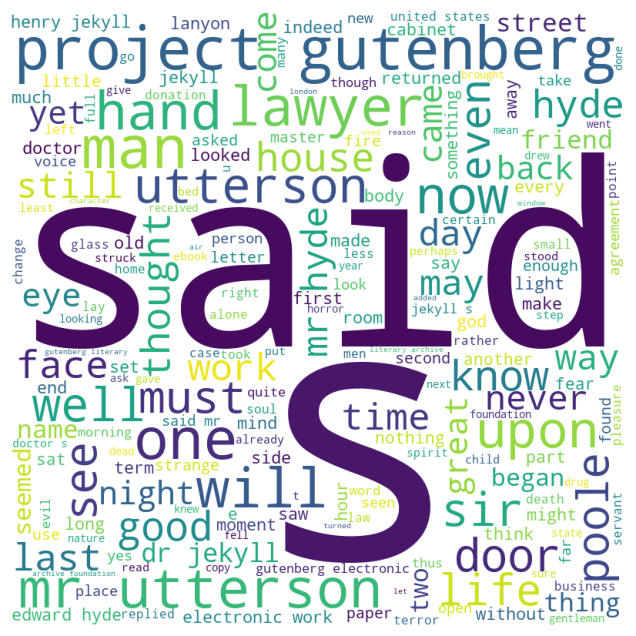

In [25]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

#wordcloud has its' own stopwords,  they have to be placed into a set before use
# We already removed most of the stopwords, but the wordcloud generator appears to need this
# set to run, so we will use it


stopwords = set(STOPWORDS)

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(mywords)
 
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")

In [26]:
# add a couple more words to the set stopwards
# the worlds below are large in the plot, but don't carry much information about the book
# so I have added them to the stopwards

stopwords.add("said")
stopwords.add("s")
stopwords.add("project")
stopwords.add('gutenberg')
stopwords.add('one')
stopwords.add('man')
stopwords.add('will')

(np.float64(-0.5), np.float64(799.5), np.float64(799.5), np.float64(-0.5))

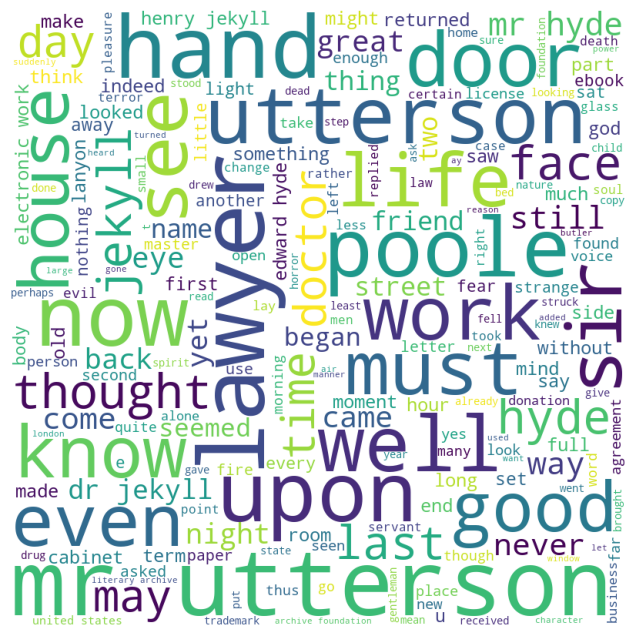

In [27]:
#Plotting the wordplot again with more words removed


wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(mywords)
 
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")